In [21]:
import pathlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Parameters

In [22]:
exclude_str = ['Outlier']
sub_type_max_cell = 599
random_state = 0

## Load Data

In [23]:
cell_tidy_data = pd.read_msgpack(
    '/home/hanliu/project/mouse_rostral_brain/study/ClusteringSummary/Summary/TotalClusteringResults.msg'
)

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The read_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [24]:
judge = cell_tidy_data[[
    'CellClass', 'MajorType', 'SubType'
]].applymap(lambda i: sum([j in i for j in exclude_str])).sum(axis=1) == 0
cell_tidy_data = cell_tidy_data[judge].copy()

In [25]:
cell_tidy_data['CellClass'].value_counts()

Exc     67324
Inh     28077
NonN     8167
Name: CellClass, dtype: int64

## Make Multi-Level Table

In [26]:
down_sample_cells = cell_tidy_data.groupby('SubType').apply(
    lambda i: i if i.shape[0] <= sub_type_max_cell
    else i.sample(sub_type_max_cell, random_state=random_state))
down_sample_cells.index = down_sample_cells.index.droplevel(0)

In [27]:
cluster_final_reads = down_sample_cells.groupby('SubType')['FinalReads'].sum()
cluster_final_cells = down_sample_cells['SubType'].value_counts()
cluster_final_mean_reads = cluster_final_reads / cluster_final_cells

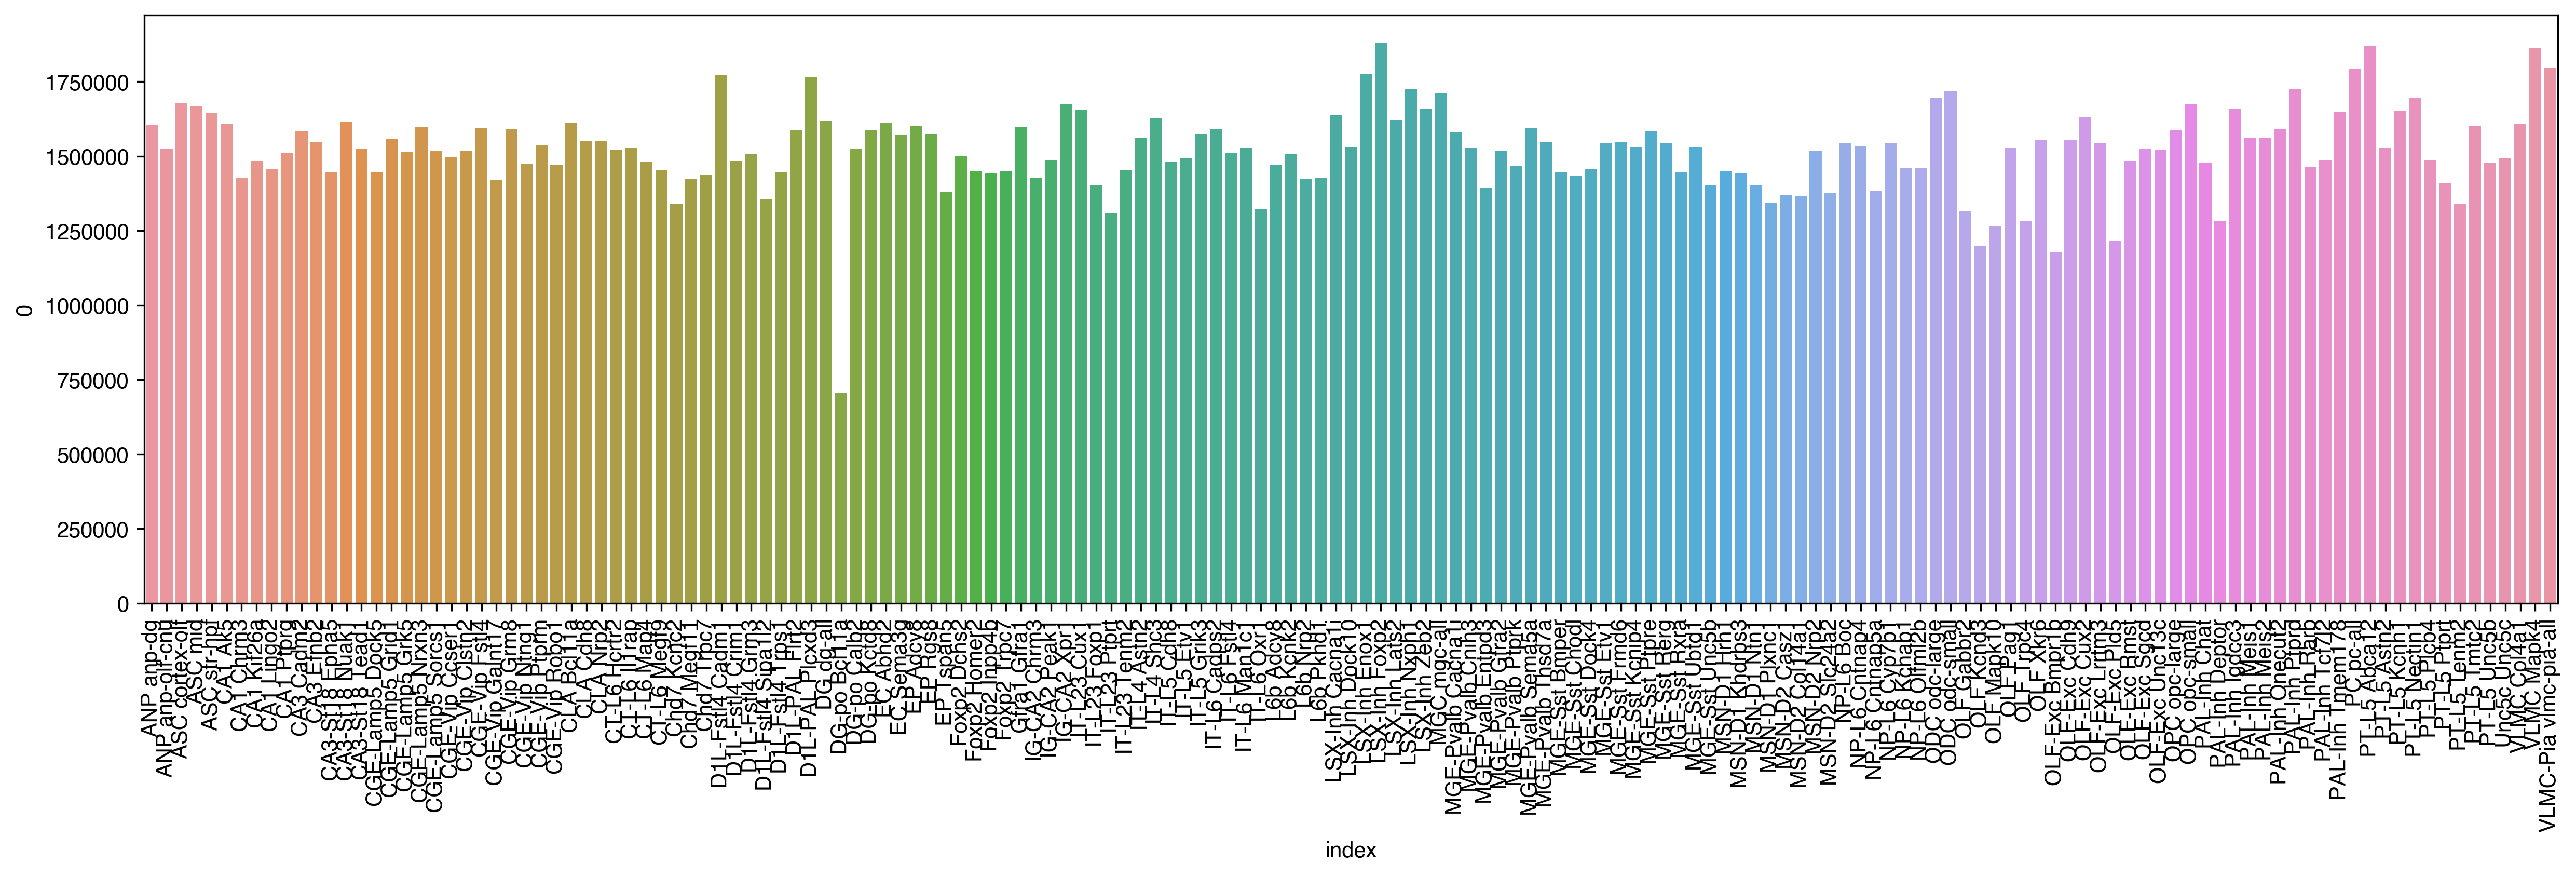

In [28]:
fig = plt.figure(figsize=(20, 5), dpi=300)

ax = sns.barplot(data=cluster_final_mean_reads.reset_index(), x='index', y=0)
ax.xaxis.set_tick_params(rotation=90)

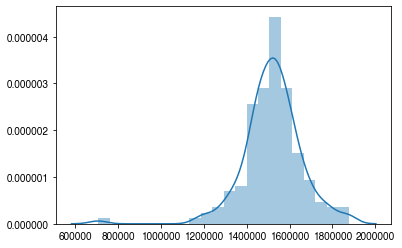

In [29]:
sns.distplot(cluster_final_mean_reads)

## Save

In [30]:
bulk_design_df = down_sample_cells[['AllcPath', 'CellClass', 'MajorType', 'SubType']]
print(bulk_design_df.shape[0], 'cells')
bulk_design_df.head()

53927 cells


,AllcPath,CellClass,MajorType,SubType
10E_M_122,/gale/raidix/rdx-4/mapping/10E/CEMBA190625-10E...,NonN,ANP,ANP anp-dg
10E_M_308,/gale/raidix/rdx-4/mapping/10E/CEMBA190625-10E...,NonN,ANP,ANP anp-dg
10F_M_194,/gale/raidix/rdx-4/mapping/10F/CEMBA190625-10F...,NonN,ANP,ANP anp-dg
10F_M_2304,/gale/raidix/rdx-4/mapping/10F/CEMBA190627-10F...,NonN,ANP,ANP anp-dg
10F_M_610,/gale/raidix/rdx-4/mapping/10F/CEMBA190625-10F...,NonN,ANP,ANP anp-dg


In [32]:
bulk_design_df.to_csv('/home/hanliu/ddn/hanliu/mouse_rostral_brain/MultiLevelCluster/cell_table.csv')